## 타이타닉 생존율을 위한 데이터 분석 - EDA(Exploratory Data Analysis)기반 데이터 분석
- EDA는 데이터를 시각화 하고 요약 통계를 통해 이해 함으로써 데이터 구조, 이상치, 패턴 등을 발견하는 활동(과정) 입니다.
- 데이터 분석 과정의 초기단계에서 중요한 역할을  하며,  데이터에 대한 초기 통찰을 얻어 모델링 작업을 위한 기초를 다져 봅니다.

EDA의 주요 목적
- 데이터 이해
- 이상치 발견
- 가설 설정
- 데이터 변환

EDA의 주요 기법
- 기술 통계 : 평균, 중앙값, 분산, 표준 편차 등 기본 통계량을 계산하여 데이터의 특성을 파악합니다.
- 데이터 시각화 - seaborn
- 상관분석 : 두 변수 간의 상관관계를 분석하여 변수 간의 관계를 파악합니다.
- 히트맵(Heatmap) : 상관관계를 시각적으로 표현 합니다.

### 시작하기
- 머신러닝에는 데이터 전처리, 회귀, 분류, 군집화, 연관규칙학습, 강화학습, 자연어처리 등 다양한 분야가 있다.
- 머신 러닝 모델을 구축할 때 올바른 데이터로 훈련하기 위해서는 반드시 데이터 전처리 단계부터 시작해야 합니다.

### 머신 러닝 모델 학습을 위한 구현 순서
1. 라이브러리 임포트
2. 데이터셋 임포트
3. 결측데이터 처리
4. 범주형 데이터 인코딩 방법(원-핫 인코딩)
5. 데이터 세트를 훈련세트와 테스트 세트로 나누기
6. 특성 스케일링(필수아님 - 필요여부에 따라)

* 한글 폰트 적용 위한 공통 코드작업 - 내가

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #한글 폰트 관련

공통 코드 - 한글 폰트 설정
- 경로 주기
    - 상대경로 : 클라우드나 웹서버에 올릴때 경로 이슈를 해결할 수 있다.
    - 하나 위의 경로는 ../로 사용하고 현재 바라보는 경로는 ./를 사용한다.
    예) pythonbasic > EDAProject > XX.ipynb
          한글 글꼴 파일의 위치
          pythonbasic > malgun.ttf

In [7]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
path = "../malgun.ttf"
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family=font_name)
plt.rc('font', family="Malgun Gothic")

python의 경고 메세지를 무시하는 설정이 있다.
경고 메세지가 출력되지 않게 만들어, 경고로 인한 코드 실행이 방해받지 않도록 할 수 있다.

In [16]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [27]:
# 훈련 데이터 - 모형
df_titanic = pd.read_csv("../section17/data/titanic/train.csv")
# 테스트 데이터 (답안지)
df_test = pd.read_csv("../section17/data/titanic/test.csv")
# 1번 클립 - EDA 실습, 분포, 파트, 시각화 분석, 데이터 전처리, 결측 처리.....
# 2번 클립 - 머신 러닝(회귀, 분류), 손실율(기준 - 판단), 레포팅 작업
# 목표 : Survived 컬럼인 생존 여부를 예측하는 프로젝트이다. 
submission = pd.read_csv("../section17/data/titanic/gender_submission.csv")

In [12]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df_titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
df_titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측치를 seaborn을 활용하여 시각화하기

In [ ]:
import seaborn as sns
# insert here

### 2.1 Target 변수 찾기 (Survived)

In [21]:
df_titanic["Survived"].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

<Axes: ylabel='count'>

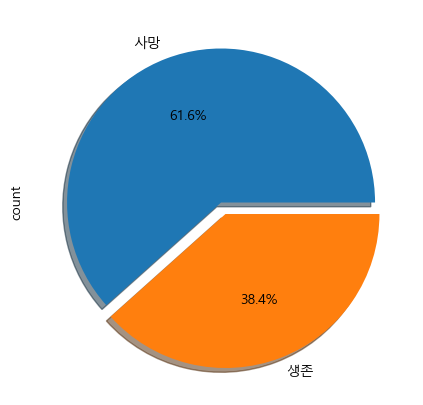

In [30]:
plt.figure(figsize = (8,5))
labels = ["사망", "생존"]
df_titanic["Survived"].value_counts().plot.pie(explode = [0,0.08], 
                                                shadow = True,
                                                autopct = "%1.1f%%", 
                                                labels = labels)

사망 비율은 61.6%, 생존 비율은 38.4%로 사망한 탑승객의 수가 더 많은 것으로 확인된다.

In [32]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
df_titanic["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

###  2.2 성별(남성 : male, 여성 : female)   
남성의 탑승자 수가 더 많지만 여성의 생존자 수가 더 많다.

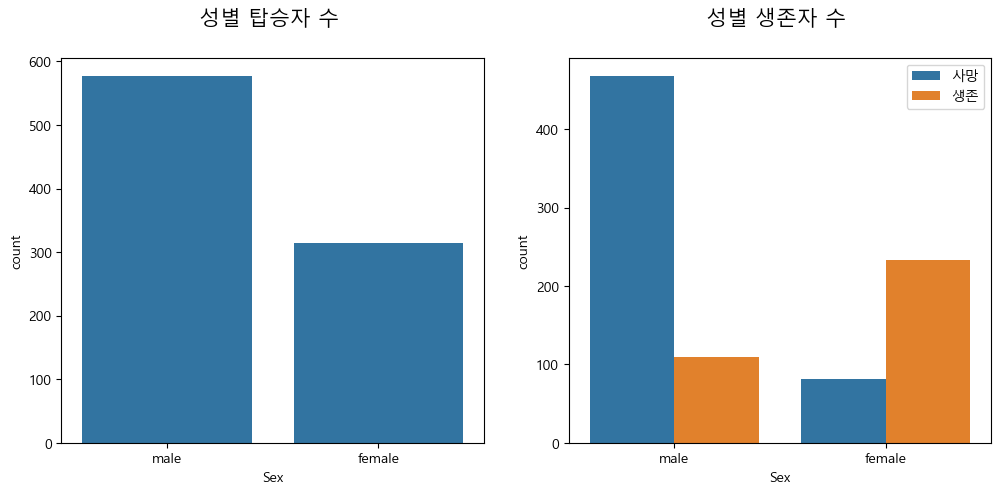

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].set_title("성별 탑승자 수 \n", size=15)
sns.countplot(x="Sex", data=df_titanic, ax=axes[0])
axes[1].set_title("성별 생존자 수 \n", size=15)
sns.countplot(x="Sex", hue="Survived", data=df_titanic, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])